In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
from multiprocessing import Pool
import re
from FlowCytometryTools import FCMeasurement
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

In [2]:
data_dir = "/home/hv270/rds/rds-who1000-cbrc/user/wja24/shared/hv270/data_home"

In [3]:
PLT = pd.read_hdf("%s/processed/PLT.hdf" % data_dir,key="PLT")

In [4]:
phenotypes = pd.read_csv("%s/processed/phenotypes.csv" % data_dir)

In [5]:
phenotypes.iloc[0]

Unnamed: 0                   0
PROJECT                PFC_4_U
SAMPLE_ID               C0WX14
DATE                2016-01-12
REST_FIB_1            1.979151
                       ...    
PAR4_PSEL_VAL_OK          True
PAR4_PSEL_QC_OK              1
PAR4                  0.207053
DAYS                      -554
cohort                     0.0
Name: 0, Length: 105, dtype: object

In [6]:
phenotypes.loc[~phenotypes.ADP.isnull()].sort_values("ADP")

,Unnamed: 0,PROJECT,SAMPLE_ID,DATE,REST_FIB_1,REST_FIB_2,REST_PSEL_1,REST_PSEL_2,ADP_FIB_1,ADP_FIB_2,...,PAR4_FIB_VAL_OK,PAR4_FIB_QC_OK,PAR4_PSEL_REP_DELTA,PAR4_PSEL_REP_OK,PAR4_PSEL,PAR4_PSEL_VAL_OK,PAR4_PSEL_QC_OK,PAR4,DAYS,cohort
170,170,PFC_4,C18QGU,2017-11-16,-0.062506,0.259769,-0.126878,-0.145130,-2.554944,-2.507100,...,True,1,0.093224,True,-1.424476,True,1,-2.194192,120,0.0
65,72,PFC_4_U,C0X3EG,2016-01-20,-1.117794,-1.247073,-0.370590,-0.441595,-2.291348,-2.539745,...,True,1,0.327413,True,-0.304067,True,1,-1.414713,-546,0.0
314,314,PFC_4,C19GGP,2018-05-18,-1.799912,-1.130136,-0.288698,-0.225269,-1.575912,-1.682600,...,True,1,0.214083,True,0.691589,True,1,-0.090733,303,0.0
87,89,PFC_4_U,C0X1Q0,2016-01-22,-2.755232,-2.031737,-0.472600,-0.223125,-1.753615,-1.615210,...,True,1,-0.144717,True,-1.757365,True,1,-2.301764,-544,0.0
525,525,PFC_4,C1A27H,2018-11-23,-1.512030,-1.130136,-0.894161,-0.872931,-1.470175,-1.399740,...,True,1,-0.188811,True,-1.770206,True,1,-1.606158,492,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,459,PFC_4,C19VNP,2018-08-16,0.283741,-0.355543,0.447596,0.260805,1.586561,1.626880,...,True,1,0.219819,True,0.679869,True,1,1.021331,393,1.0
137,137,PFC_4,C18H96,2017-09-25,1.726248,1.901418,0.282973,0.351210,2.049367,2.040989,...,True,1,-0.044682,True,0.543881,True,1,0.976251,68,0.0
443,441,PFC_4,C19UCE,2018-08-07,1.128420,0.761136,0.458897,0.506726,1.798554,1.860319,...,True,1,-0.133788,True,2.519037,True,1,2.548132,384,1.0
462,462,PFC_4,C19VTD,2018-08-20,0.691620,0.773816,0.314602,0.337158,1.788820,1.813790,...,True,1,0.141657,True,2.252395,True,1,2.181698,397,1.0


# Sysmex scattergrams

In [7]:
IDs = PLT.ID.unique().tolist()

In [8]:
ID_1 = "C19GGP"
ID_2 = "C19UCE"

In [28]:
X_1 = PLT.loc[PLT.ID == ID_1].sample(3000)
X_2 = PLT.loc[PLT.ID == ID_2].sample(3000)

In [29]:
X = pd.concat([X_1,X_2],axis=0)
#X = X_1
X = X.sample(X.shape[0],replace=False)

In [30]:
ID = X.ID == ID_2

In [53]:
#cm = LinearSegmentedColormap.from_list(name="bbb",colors=["#8D8DFE","#FF8C8C"])
cm = LinearSegmentedColormap.from_list(name="bbb",colors=[(10./256,41./256,245./256),(236./256,62./256,48./256)])
#cm = "bwr"

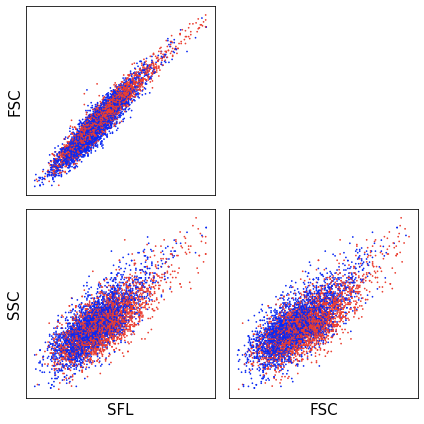

In [54]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(221)
alpha = 1.
s = .5
ax.scatter(X.SFL,X.FSC,c=ID,cmap=cm,s=s,alpha=alpha)
plt.xticks([])
plt.yticks([])
#plt.xlabel("SFL")
plt.ylabel("FSC",fontsize=15)

ax = fig.add_subplot(223)
ax.scatter(X.SFL,X.SSC,c=ID,cmap=cm,s=s,alpha=alpha)
plt.xticks([])
plt.yticks([])
plt.xlabel("SFL",fontsize=15)
plt.ylabel("SSC",fontsize=15)

ax = fig.add_subplot(224)
ax.scatter(X.FSC,X.SSC,c=ID,cmap=cm,s=s,alpha=alpha)
plt.xticks([])
plt.yticks([])
plt.xlabel("FSC",fontsize=15)
#plt.ylabel("SSC")
plt.tight_layout()
plt.savefig("/home/hv270/sysmex2pf/figures/scattergrams.pdf")

# Gold standard

In [175]:
def build_df_bead(files,exp):
    #files = [f for f in files if "_2_" not in f]
    #date = [f.split('/')[1] for f in files]
    date = [re.compile("[0-9]{4}201[78]").findall(f)[0] for f in files]
    date_files = dict()
    
    dfs = []
    for k in range(len(date)):
        if date[k] in date_files:
            date_files[date[k]].append(files[k])
        else:
            date_files[date[k]] = [files[k]]
    
    for date in date_files:
        file = date_files[date][0]
        if len(date_files[date]) > 1:
            for f in date_files[date][1:]:
                if f.count("2") > file.count("2"):
                    file = f
                elif f.count("3") > file.count("3"):
                    file = f
                elif f.lower().count("repeat") > file.lower().count("repeat"):
                    file = f
            print("Selected %s from %s" % (f,date_files[date]))
        meas = FCMeasurement(ID='Test Sample', datafile=file)

        meta = meas.meta
        meas = meas.data
        meas["date"] = date
        meas["FITC"] = un_log(meas["FL1 Log"],scale,shift)
        meas["PE"] = un_log(meas["FL2 Log"],scale,shift)
        meas = meas.iloc[np.random.choice(meas.shape[0],min(meas.shape[0],3000),replace=False)]
        dfs.append(meas)
        
    df_ = pd.concat(dfs,copy=False,sort=True)
    df_.reset_index(inplace=True)
    del df_["index"]
    df_["exp"] = exp
    
    return df_

In [178]:
def un_log(x,scale,shift):
    return np.exp((np.transpose(x) - shift)*scale)

def to_log(x,scale,shift):
    X = np.array(x)
    if np.mean(X < 0.000001) > 0.1:
        print("WARNING : clipping more than 10% of the values")
    X[X < 0.000001] = 0.000001
    return np.log(X)/scale + shift

scale = np.log(10)*(4/1024)
shift = -(np.log(0.1024)/np.log(10))/scale

In [61]:
os.chdir('/home/hv270/')
datadir = "/home/hv270/rds/rds-who1000-cbrc/user/wja24/shared/hv270/data_home"
os.chdir(datadir)
fitc = glob.glob("2018/*/*fitc*.LMD") + glob.glob("2018/*/*FIT*.LMD") + glob.glob("2017/*/*fitc*.LMD") + glob.glob("2017/*/*FIT*.LMD")
pe = glob.glob("2018/*/*pe[_. ]*.LMD") + glob.glob("2018/*/*psel[_ ]*.LMD") + glob.glob("2017/*/*psel[_ ]*.LMD") + glob.glob("2018/*/*PE*.LMD") + glob.glob("2018/*/*PSEL*.LMD") + glob.glob("2017/*/*pe[_. ]*.LMD") + glob.glob("2017/*/*PE*.LMD") + glob.glob("2017/*/*PSEL*.LMD")

In [63]:
fitc = build_df_bead(fitc,"fitc")
pe = build_df_bead(pe,"pe")

Selected 2018/22102018/pf_comp_22102018 FITC 00087600 001.LMD from ['2018/22102018/pf_comp_2_22102018 fitc 00087623 001.LMD', '2018/22102018/pf_comp_22102018 FITC 00087600 001.LMD']
Selected 2018/19022018/Comp_PF_2_19022018 FITC 00057248 001.LMD from ['2018/19022018/comp_PF_19022018 fitc 00057235 001.LMD', '2018/19022018/Comp_PF_2_19022018 FITC 00057248 001.LMD']
Selected 2018/05022018/COMP_PF_2_05022018 FITC 00055469 001.LMD from ['2018/05022018/comp_pf_05022018 fitc 00055437 001.LMD', '2018/05022018/COMP_PF_2_05022018 FITC 00055469 001.LMD']
Selected 2018/23082018/pf_comp_23082018 FITC 00083518 001.LMD from ['2018/23082018/PF comp_2 23082018_fitc 00083530 001.LMD', '2018/23082018/pf_comp_23082018 FITC 00083518 001.LMD']
Selected 2018/05032018/COMP_PF_3_05032018 FITC 00058913 001.LMD from ['2018/05032018/PF comp_05032018 fitc 00058873 001.LMD', '2018/05032018/PF comp_05032018 fitc 00058884 001.LMD', '2018/05032018/COMP_PF_3_05032018 FITC 00058913 001.LMD']
Selected 2018/10072018/COMP_

In [37]:
def compensation_matrix(date,fitc,pe,plot=False,i=0):
    
    print("Compensation Matrix %s " % date)
    
    if ((fitc.date == date).sum())*((pe.date == date).sum()) == 0:
        old_date = date
        dates = [datetime.strptime(d,"%d%m%Y") for d in fitc.date.unique().tolist()]
        dates = list(set(dates).intersection([datetime.strptime(d,"%d%m%Y") for d in pe.date.unique().tolist()]))
        date = datetime.strptime(date,"%d%m%Y")
        deltas = [(d-date).total_seconds() for d in dates]
        k = np.argmin(np.abs(deltas))
        date = dates[k]
        date = datetime.strftime(date,"%d%m%Y")
        print("%s -> %s" % (old_date,date))
        
    x_1p,y_1p,x_1n,y_1n, X_f,neg_1,pos_1 = get_neg_pos(fitc.loc[(fitc.date == date) & (fitc["PE"] < 200)],plot,disc="FL1 Log",name="FITC")
    x_2p,y_2p,x_2n,y_2n, X_p,neg_2,pos_2 = get_neg_pos(pe.loc[(pe.date == date) &  (pe["FITC"] < 200)],plot,disc="FL2 Log",name="PE")
     
    alpha_ = (y_1p - y_1n )/ (x_1p - x_1n)
    beta_ = (x_2p - x_2n )/ (y_2p - y_2n)
     
    M_inv = np.array([[1,beta_],[alpha_,1]])

    M = np.linalg.inv(M_inv)

    X_ff = np.transpose(np.array(M @ np.transpose(X_f)))
    X_pp = np.transpose(np.array(M @ np.transpose(X_p)))
     
    if plot == True:
        plot_compensation(X_f,X_ff,pos_1,neg_1)
        plt.title("FITC")
        plot_compensation(X_p,X_pp,pos_2,neg_2)
        plt.title("PE")
        
    return M,i

In [179]:
def build_df_fc(files,exp):
    
    users = [f.split('/')[1].split("_")[1] for f in files]
    dates = [re.compile("[0-9]{4}201[78]").findall(f)[0] for f in files]
    for i in range(len(users)):
        if users[i][-2:] == "FB":
            users[i] = users[i][:-2]
    
    to_keep = [i for i in range(len(users))]
    
    files = [files[i] for i in to_keep]
    users = [users[i] for i in to_keep]
    dates = [dates[i] for i in to_keep]

    print("%s %2d files /!\\ Filtering on size and removing all null measurements" % (exp,len(users)))

    dfs = []
    
    files_id = dict()
    for user in users:
        files_id[user] = 1
    
    for k in range(len(users)):
        
        meas = FCMeasurement(ID='Test Sample', datafile=files[k]).data
        meas = meas.loc[(meas["FL2 Log"] > 0) & (meas["FL1 Log"] > 0)]
        if k == 0:
            plt.scatter(meas["FS Log"],meas["SS Log"],s=0.5,label=exp)
            plt.plot([250,690,690,250,250],[600,600,100,100,600],c="red")
            plt.title("Gating of Platelets")
            plt.xlabel("Forward Scatter (Log scale)")
            plt.ylabel("Side Scatter (Log scale)")
            plt.legend(markerscale=5)
        cond = (meas["FS Log"] <= 690) & (meas["SS Log"] <= 600) & (meas["FS Log"] > 250) & (meas["SS Log"] > 100)
        if cond.sum() == 0:
            print("problem, meas has no row...")
            print(files[k])
            meta = FCMeasurement(ID='Test Sample', datafile=files[k]).meta
            plt.figure()
            plt.scatter(meas["FS Log"],meas["SS Log"],s=0.5,label=exp)
            plt.plot([250,690,690,250,250],[600,600,100,100,600],c="red")
            plt.title("Gating of Platelets")
            plt.xlabel("Forward Scatter (Log scale)")
            plt.ylabel("Side Scatter (Log scale)")
            plt.legend(markerscale=5)
            continue
        
        meas = meas.loc[cond]
        meas = meas.sample(min(3000,meas.shape[0]))

        meas["FITC"] = un_log(meas["FL1 Log"],scale,shift)
        meas["PE"] = un_log(meas["FL2 Log"],scale,shift)
        meas["FS"] = un_log(meas["FS Log"],scale,shift)
        meas["SS"] = un_log(meas["SS Log"],scale,shift)
        meas["ID"] = users[k]
        meas["date"] = dates[k]
        meas["file"] = files_id[users[k]]
        files_id[users[k]] += 1

        dfs.append(meas)
        
    df_ = pd.concat(dfs,copy=False,sort=True)
    df_.reset_index(inplace=True)
    del df_["index"]
    df_["exp"] = exp
    print("Done with %s" % exp)
    return df_

adp 886 files /!\ Filtering on size and removing all null measurements
Done with adp
adp done !
rest 886 files /!\ Filtering on size and removing all null measurements
problem, meas has no row...
CBR_159_FACS_LMD/28082018_C19WD4/C19WD4 RESTING 00083838 004.LMD
Done with rest
rest done !


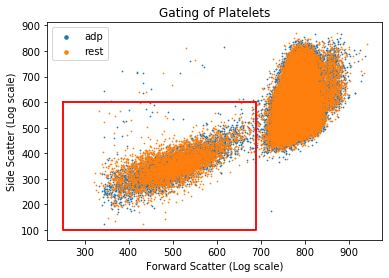

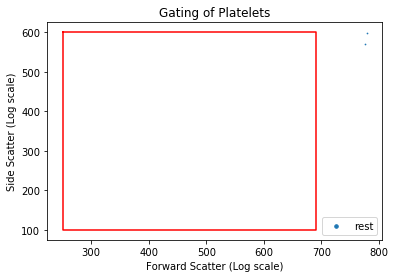

In [180]:
#meas = FCMeasurement(ID='Test Sample', datafile=files[k]).data[columns]
os.chdir('/home/hv270/')
datadir = "/home/hv270/rds/rds-who1000-cbrc/user/wja24/shared/hv270/data_home"
os.chdir(datadir)
adp = glob.glob("CBR_159_FACS_LMD/*/*ADP*.LMD")
crp = glob.glob("CBR_159_FACS_LMD/*/*CRP*.LMD")
f_neg = glob.glob("CBR_159_FACS_LMD/*/*FITC*.LMD")
pe_neg = glob.glob("CBR_159_FACS_LMD/*/*PE*.LMD")
rest = glob.glob("CBR_159_FACS_LMD/*/*REST*.LMD")

#files_exp = [[adp,"adp"],[crp,"crp"],[rest,"rest"],[f_neg,"f_neg"],[pe_neg,"pe_neg"]]
files_exp = [[adp,"adp"],[rest,"rest"]]

dfs = []
def collect_results(result):
    dfs.append(result)

for f in files_exp:
    dfs.append(build_df_fc(f[0],f[1]))
    print("%s done !" % f[1])

df_fc = pd.concat([df for df in dfs],sort=True)

In [185]:
plt.get_cmap("bwr")(.999)

(1.0, 0.0, 0.0, 1.0)

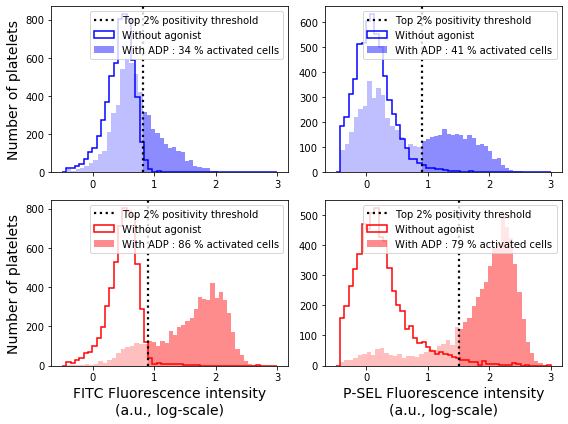

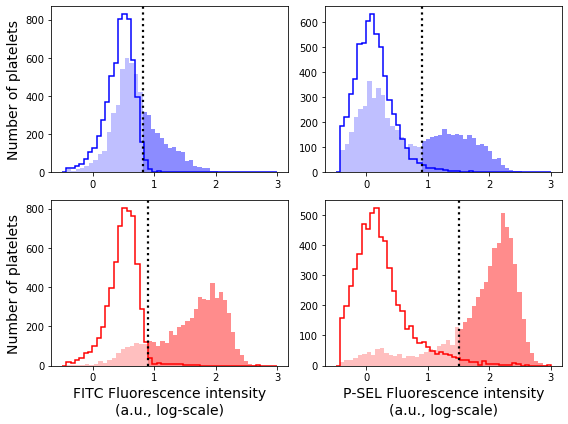

In [216]:
for add_legends in [True,False]:

    col1 = "FITC"
    rest_intensity = np.log10(df_fc.loc[(df_fc.ID == ID_1) & (df_fc.exp == "rest"),col1])
    adp_intensity = np.log10(df_fc.loc[(df_fc.ID == ID_1) & (df_fc.exp == "adp") ,col1])
    pp_th = rest_intensity.quantile(0.98)
    pp = (adp_intensity > pp_th).mean()
    density = False
    
    hatch = ""
    alpha_rest = 1.
    alpha_adp_rest = .25
    alpha_adp = .45
    range_ = (-0.5,3)
    color = plt.get_cmap("bwr")(0)
    vline_color = "black"
    vline_lw = 2.2
    font_size = 14

    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(221)
    plt.hist(rest_intensity,bins=50,label="Without agonist",lw=1.5,histtype="step",color=color,range=range_,density=density);
    #plt.hist(rest_intensity,bins=50,label="Without agonist",color=color,range=range_,density=density,alpha=alpha_rest);
    
    plt.axvline(pp_th,label="Top 2% positivity threshold",c=vline_color,ls=":",lw=vline_lw )
    bins_low = int(50 * (pp_th - range_[0])/(range_[1]-range_[0]))
    bins_high = 50-bins_low
    plt.hist(adp_intensity,bins=bins_low,hatch=hatch,color=color,range=(range_[0],pp_th),density=density,alpha=alpha_adp_rest);
    plt.hist(adp_intensity,bins=bins_high,hatch=hatch,label="With ADP : %d %% activated cells" % (100*pp),color=color,range=(pp_th,range_[1]),density=density,alpha=alpha_adp);
    if add_legends: plt.legend()
    #plt.xlabel("FITC Fluorescence intensity (a.u., log-scale)")
    plt.ylabel("Number of platelets",fontsize=font_size)

    col1 = "PE"
    rest_intensity = np.log10(df_fc.loc[(df_fc.ID == ID_1) & (df_fc.exp == "rest"),col1])
    adp_intensity = np.log10(df_fc.loc[(df_fc.ID == ID_1) & (df_fc.exp == "adp") ,col1])
    pp_th = rest_intensity.quantile(0.98)
    pp = (adp_intensity > pp_th).mean()

    ax = fig.add_subplot(222)
    plt.hist(rest_intensity,bins=50,label="Without agonist",lw=1.5,histtype="step",color=color,range=range_,density=density,alpha=alpha_rest);
    plt.axvline(pp_th,label="Top 2% positivity threshold",c=vline_color,ls=":",lw=vline_lw )
    bins_low = int(50 * (pp_th - range_[0])/(range_[1]-range_[0]))
    bins_high = 50-bins_low
    plt.hist(adp_intensity,bins=bins_low,hatch=hatch,color=color,range=(range_[0],pp_th),density=density,alpha=alpha_adp_rest);
    plt.hist(adp_intensity,bins=bins_high,hatch=hatch,label="With ADP : %d %% activated cells" % (100*pp),color=color,range=(pp_th,range_[1]),density=density,alpha=alpha_adp);
    if add_legends: plt.legend()
    #plt.xlabel("P-SEL Fluorescence intensity (a.u., log-scale)")
    #plt.ylabel("Number of platelets")

    col1 = "FITC"
    rest_intensity = np.log10(df_fc.loc[(df_fc.ID == ID_2) & (df_fc.exp == "rest"),col1])
    adp_intensity = np.log10(df_fc.loc[(df_fc.ID == ID_2) & (df_fc.exp == "adp") ,col1])
    pp_th = rest_intensity.quantile(0.98)
    pp = (adp_intensity > pp_th).mean()

    color = plt.get_cmap("bwr")(.999)

    ax = fig.add_subplot(223)
    plt.hist(rest_intensity,bins=50,label="Without agonist",lw=1.5,histtype="step",range=range_,color=color,density=density,alpha=alpha_rest);
    plt.axvline(pp_th,label="Top 2% positivity threshold",c=vline_color,ls=":",lw=vline_lw )
    bins_low = int(50 * (pp_th - range_[0])/(range_[1]-range_[0]))
    bins_high = 50-bins_low
    plt.hist(adp_intensity,bins=bins_low,hatch=hatch,color=color,range=(range_[0],pp_th),density=density,alpha=alpha_adp_rest);
    plt.hist(adp_intensity,bins=bins_high,hatch=hatch,label="With ADP : %d %% activated cells" % (100*pp),color=color,range=(pp_th,range_[1]),density=density,alpha=alpha_adp);
    if add_legends: plt.legend()
    plt.xlabel("FITC Fluorescence intensity\n(a.u., log-scale)",fontsize=font_size)
    plt.ylabel("Number of platelets",fontsize=font_size)

    col1 = "PE"
    rest_intensity = np.log10(df_fc.loc[(df_fc.ID == ID_2) & (df_fc.exp == "rest"),col1])
    adp_intensity = np.log10(df_fc.loc[(df_fc.ID == ID_2) & (df_fc.exp == "adp") ,col1])
    pp_th = rest_intensity.quantile(0.98)
    pp = (adp_intensity > pp_th).mean()

    ax = fig.add_subplot(224)
    plt.hist(rest_intensity,bins=50,label="Without agonist",lw=1.5,histtype="step",range=range_,color=color,density=density,alpha=alpha_rest);
    plt.axvline(pp_th,label="Top 2% positivity threshold",c=vline_color,ls=":",lw=vline_lw )
    bins_low = int(50 * (pp_th - range_[0])/(range_[1]-range_[0]))
    bins_high = 50-bins_low
    plt.hist(adp_intensity,bins=bins_low,hatch=hatch,color=color,range=(range_[0],pp_th),density=density,alpha=alpha_adp_rest);
    plt.hist(adp_intensity,bins=bins_high,hatch=hatch,label="With ADP : %d %% activated cells" % (100*pp),color=color,range=(pp_th,range_[1]),density=density,alpha=alpha_adp);
    if add_legends: plt.legend()
    plt.xlabel("P-SEL Fluorescence intensity\n(a.u., log-scale)",fontsize=font_size)
    #plt.ylabel("Number of platelets")

    plt.tight_layout()
    plt.savefig("/home/hv270/sysmex2pf/figures/gold_standard_1_%s.pdf" % ("legend" if add_legends else "no_legend"))

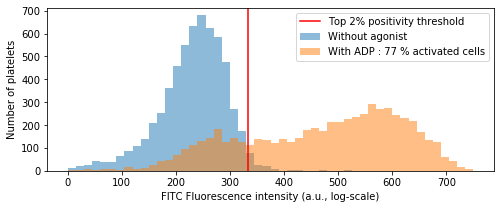

In [114]:
rest_intensity = df_fc.loc[(df_fc.ID == ID_2) & (df_fc.exp == "rest"),"FL1 Log"]
adp_intensity = df_fc.loc[(df_fc.ID == ID_2) & (df_fc.exp == "adp") ,"FL1 Log"]
pp_th = rest_intensity.quantile(0.98)
pp = (adp_intensity > pp_th).mean()

fig = plt.figure(figsize=(8,3))
plt.hist(rest_intensity,range=(0,750),bins=50,alpha=.5,label="Without agonist");
plt.axvline(pp_th,label="Top 2% positivity threshold",c="red")
plt.hist(adp_intensity,range=(0,750),bins=50,alpha=.5,label="With ADP : %d %% activated cells" % (100*pp));
plt.legend()
plt.xlabel("FITC Fluorescence intensity (a.u., log-scale)")
plt.ylabel("Number of platelets")
plt.savefig("/home/hv270/sysmex2pf/figures/gold_standard_2.pdf")

In [64]:
df_fc["FITC Log"] = 0.
df_fc["PE Log"] = 0.

# Apply compensation
order = pd.to_datetime(df_fc.date.unique(),format="%d%m%Y").sort_values()
dates = order.strftime("%d%m%Y").tolist()
comp = np.zeros((len(dates),2,2))

pool = Pool(processes=5)
def collect_results(result):
    M = result[0]
    i = result[1]
    comp[i] = M

for i in range(len(dates)):
    pool.apply_async(compensation_matrix, args=(dates[i],fitc,pe,False,i), callback=collect_results)

pool.close()
pool.join()

for i in range(comp.shape[0]):
    M = comp[i]
    if M[0,1] > 0 or M[1,0] > 0:
        print("Weird matrix at date %s, using matrix from previous day " % dates[i])
        print(M)
        #compensation_matrix(dates[i],fitc,pe,plot=True)
        comp[i] = comp[i-1]

Compensation Matrix 19072017 
Compensation Matrix 20072017 
Compensation Matrix 24072017 
Compensation Matrix 25072017 
Compensation Matrix 26072017 
Compensation Matrix 31072017 
Compensation Matrix 01082017 
Compensation Matrix 02082017 
Compensation Matrix 04082017 
Compensation Matrix 07082017 
Compensation Matrix 08082017 
Compensation Matrix 09082017 
Compensation Matrix 11082017 
Compensation Matrix 14082017 
Compensation Matrix 16082017 
Compensation Matrix 17082017 
Compensation Matrix 18082017 
Compensation Matrix 21082017 
Compensation Matrix 30082017 
Compensation Matrix 31082017 
Compensation Matrix 01092017 
Compensation Matrix 15092017 
Compensation Matrix 18092017 
Compensation Matrix 20092017 
Compensation Matrix 21092017 
Compensation Matrix 22092017 
Compensation Matrix 25092017 
Compensation Matrix 26092017 
Compensation Matrix 27092017 
Compensation Matrix 29092017 
Compensation Matrix 02102017 
Compensation Matrix 04102017 
Compensation Matrix 06102017 
Compensati

In [78]:
corr = dict()

def compensate(X,i):
    Y = np.transpose(comp[i] @ np.transpose(X))
    return i, Y, to_log(Y,scale,shift)

def collect_results(r):
    i,X,log_X = r
    corr[i] = [X,log_X]

pool = Pool(processes=5)

for i in range(len(dates)):
    a = df_fc.loc[df_fc.date == dates[i],["FITC","PE"]]
    X = np.array(a)
    pool.apply_async(compensate, args=(X,i), callback=collect_results)
    
pool.close()
pool.join()

for i in range(len(dates)):
    c = df_fc.date == dates[i]
    df_fc.loc[c,["FITC","PE"]] = corr[i][0]
    df_fc.loc[c,["FITC Log","PE Log"]] = corr[i][1]
    
df_fc["Norm_PE"] = df_fc["PE"] / df_fc["FS"]
df_fc["Norm_FITC"] = df_fc["FITC"] / df_fc["FS"]

df_fc["PE Log norm"] = df_fc["PE Log"] - df_fc["FS Log"]
df_fc["FITC Log norm"] = df_fc["FITC Log"] - df_fc["FS Log"]

Process ForkPoolWorker-29:
Process ForkPoolWorker-27:
Process ForkPoolWorker-26:
Process ForkPoolWorker-30:
Process ForkPoolWorker-28:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/hv270/platelets/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/hv270/platelets/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/hv270/platelets/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/hv270/platelets/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/hv270/platelets/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/hv270/platelets/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File 

KeyboardInterrupt: 

Process ForkPoolWorker-32:
Process ForkPoolWorker-38:
Process ForkPoolWorker-37:
Process ForkPoolWorker-31:
Process ForkPoolWorker-36:
Process ForkPoolWorker-43:
Process ForkPoolWorker-33:
Process ForkPoolWorker-41:
Process ForkPoolWorker-40:
Process ForkPoolWorker-45:
Process ForkPoolWorker-34:
Process ForkPoolWorker-35:
Process ForkPoolWorker-39:
Process ForkPoolWorker-44:
Process ForkPoolWorker-42:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/hv270/platelets/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self

  File "/home/hv270/platelets/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/hv270/platelets/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/hv270/platelets/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/hv270/platelets/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/hv270/platelets/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/hv270/platelets/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/hv270/platelets/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/home/hv270/platelets/lib/python3.7/multiprocessing/synchronize.p

In [79]:
df_fc.head()

,FITC,FL1 Log,FL2 Log,FS,FS Log,ID,PE,SS,SS Log,TIME,date,exp,file,FITC Log,PE Log,Norm_PE,Norm_FITC,PE Log norm,FITC Log norm
0,0.0,218.0,114.0,119.671661,642.0,C18SP4,0.0,71.027885,584.0,NaN,01122017,adp,1,-401.965756,-401.965756,0.0,0.0,-1043.965756,-1043.965756
1,0.0,232.0,128.0,29.154797,485.0,C18SP4,0.0,10.363136,370.0,NaN,01122017,adp,1,-401.965756,-401.965756,0.0,0.0,-886.965756,-886.965756
2,0.0,245.0,443.0,53.744625,553.0,C18SP4,0.0,10.742771,374.0,NaN,01122017,adp,1,-401.965756,-401.965756,0.0,0.0,-954.965756,-954.965756
3,0.0,317.0,554.0,28.635021,483.0,C18SP4,0.0,5.672474,303.0,NaN,01122017,adp,1,-401.965756,-401.965756,0.0,0.0,-884.965756,-884.965756
4,0.0,459.0,636.0,33.067207,499.0,C18SP4,0.0,9.302855,358.0,NaN,01122017,adp,1,-401.965756,-401.965756,0.0,0.0,-900.965756,-900.965756


In [82]:
ADP = df_fc.loc[(df_fc.exp == "adp") & (df_fc.ID == ID_2)]
REST = df_fc.loc[(df_fc.exp == "rest") & (df_fc.ID == ID_2)]

(array([  47.,  137.,  412.,  820., 1351., 1325., 1027.,  624.,  244.,
          13.]),
 array([-1091.9657555, -1053.4657555, -1014.9657555,  -976.4657555,
         -937.9657555,  -899.4657555,  -860.9657555,  -822.4657555,
         -783.9657555,  -745.4657555,  -706.9657555]),
 <a list of 10 Patch objects>)

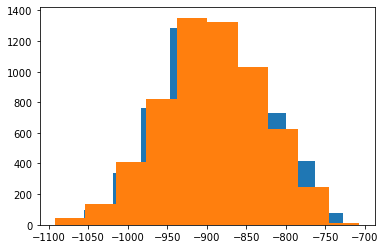

In [85]:
plt.hist(REST["PE Log norm"])
plt.hist(ADP["FITC Log norm"])